In [6]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20):
    """
    Cria um dataset bidimensional binário com
    rótulos igual 1 para todo exemplo que tiver
    o valor da primeira característica maior do
    que a da segunda, e -1 para os demais.
    """
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = criaDatasetBidimensionalBinário()


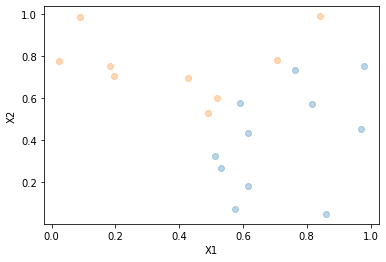

In [7]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(X, y)

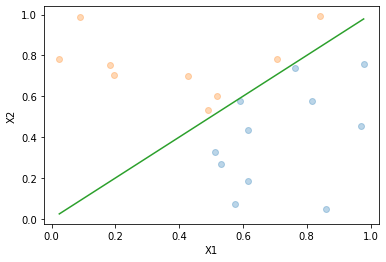

In [8]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo horizontal.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

plotaHiperplanoDatasetBidimensional(X, y, [1,-1])

In [12]:
from abc import ABC, abstractstaticmethod

class Custo(ABC):
    @abstractstaticmethod
    def erro(y, ypred):
        pass
    @abstractstaticmethod
    def custo(y, ypred):
        pass
    @abstractstaticmethod
    def gradiente(y, ypred, X):
        pass

class CustoPerceptron(Custo):
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, CustoPerceptron.erro(y, ypred))

class Adaline(Custo):
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, Adaline.erro(y, ypred))

class HingeLoss(Custo):
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        erro = HingeLoss.erro(y, ypred)
        errosmarginais = erro < 1
        ymarginais = np.copy(y)
        ymarginais[~errosmarginais] = 0
        g = np.matmul(X.T, ymarginais)
        return np.stack(g)


1.0
[ 19.51605569 -18.1249996 ]


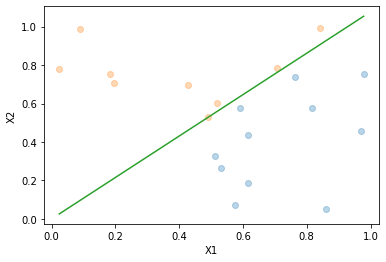

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def signal(a):
    return (a >= 0) * 2 - 1

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado em batch, com custo parametrizado.
    """
    def __init__(self, max_iter=100, custo=CustoPerceptron()):
        self.w = None
        self.activation = signal
        self.max_iter = max_iter
        self.custo = custo

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            custo = self.custo.custo(y, ypred)
            if custo == 0:
                break
            self.w += self.custo.gradiente(y, ypred, X)

    def predict(self, X):
        a = np.matmul(X, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(X, y, perceptron.w)

In [33]:
Xtr, ytr = criaDatasetBidimensionalBinário()
Xte, yte = criaDatasetBidimensionalBinário(1000)

1.0


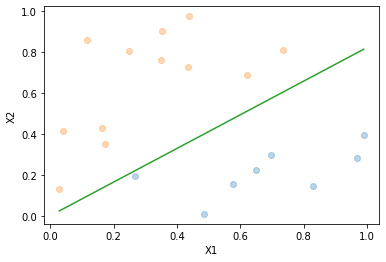

0.915


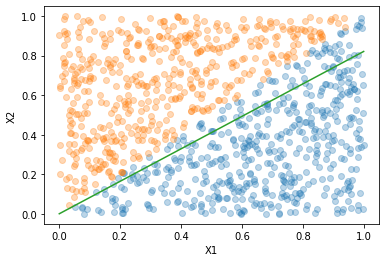

In [34]:
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(Xtr, ytr)
print(sum(ytr == perceptron.predict(Xtr))/len(ytr))
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)
plt.show()

print(sum(yte == perceptron.predict(Xte))/len(yte))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)

1.0


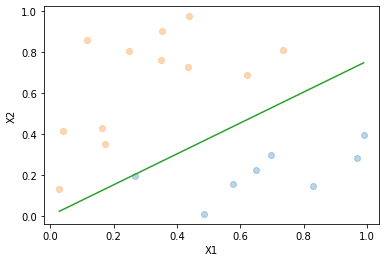

0.884


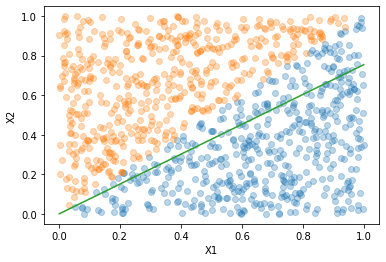

In [35]:
perceptron = Perceptron(custo=Adaline())
perceptron.fit(Xtr, ytr)
print(sum(ytr == perceptron.predict(Xtr))/len(ytr))
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)
plt.show()

print(sum(yte == perceptron.predict(Xte))/len(yte))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)

1.0


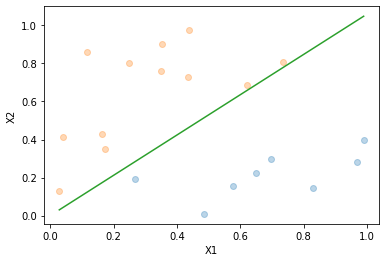

0.978


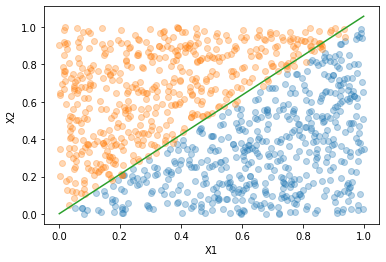

In [36]:
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(Xtr, ytr)
print(sum(ytr == perceptron.predict(Xtr))/len(ytr))
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)
plt.show()

print(sum(yte == perceptron.predict(Xte))/len(yte))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)